# Evolution of $n_{sig}$ and $n_{bkg}$ according to the cut on the BDT (fit V8)

- Works with `fit/COMMON/BDT/fit_all_data_V8_2_fits_BDTs_recomputed_sWeights.ipyng`
- BDT: `adaboost_0.8_without_P_cutDeltaM`
    * Background data: `ws` data

## Import

In [4]:
import numpy as np
import json

from bd2dst3pi.locations import loc

import sys
sys.path.append(loc.SCRIPTS)
from plot.line import plot_x_list_ys

from uncertainties import ufloat, unumpy, umath

## Tool functions

In [1]:
def get_index_max(L):
    idx = 0
    candidate_max = L[0]
    for i in range(1, len(L)):
        if candidate_max < L[i]:
            candidate_max = L[i]
            idx = i
    return idx

def efficiency(N):
    return np.array(N/N[0])

## Load data

we define the geometrical average $\sigma=\sqrt{(f\sigma_L)^2+((1-f)\sigma_R)^2}$ and the usual average $\sigma_2 = f\times \sigma_L + (1-f) \sigma_R$ of the full `common` signal shape.
`n_B` or $B$ is computed with the integral over $\mu\pm3\sigma$ under the signal peak, while `n_B2` or $B_2$ is computed with $\mu\pm3\sigma_2$.

I've finally chosen to use $\sigma_2$


In [2]:
# name of the data specified in 'fit_all_data_V8_2_fits_BDTs_recomputed_sWeights', to retrieve the file.
name_data = "common_cutDeltaM_V8_rFixed_MC_cor"

In [5]:
# def sorted_append(L, el):
#     if not isinstance(el, list):
#         el = [el]
    
#     for elem in el:
#         idx = L.searchsorted(elem)
#         L = np.insert(L, idx, elem)
#     return L

l_BDT = []
starting_value = -0.45
#starting_value = 0.15
end_value      =  0.175
step           = 0.025


value = starting_value
while value <= end_value:
    if value==0:
        value = 0
    l_BDT.append(value) 
    value = np.round(value + step, 3)

In [12]:
lS = [] # Signal B0 -> Ds 3pi
lB2_combi = [] # combinatorial background, computed with sigma as the 'usual' mean of sigmaL and sigmaR

for i, BDT in enumerate(l_BDT):
    BDT = round(BDT,3)
    if BDT==0:
        BDT=0
    
    with open(f'{loc.JSON}/{name_data}_BDT{BDT}_params.json', 'r') as f:
        params = json.load(f)

    lB2_combi.append(ufloat(params['n_B2'], params['n_B2_err'])) # combinatorial   
    lS.append(ufloat(params[f'n_sig|BDT{BDT}'],params[f'n_sig|BDT{BDT}_err']))


lS = np.array(lS)
lB2_combi = np.array(lB2_combi)

ltot2 = lS + lB2_combi
squareRootltot2 = unumpy.sqrt(ltot2)

 
#lB_combi = np.array(lB_combi)
#lB2_over_lB_combi = np.array(lB2_over_lB_combi)


In [13]:
unumpy.sqrt(lS)

array([226.5748238887895+/-0.7862723725768448,
       226.4746308108654+/-0.78586134067886,
       226.06627957425377+/-0.785606941266186,
       225.87755159398262+/-0.7831568200526143,
       225.46217747546578+/-0.7766732871625404,
       225.34174094662654+/-0.7837163996284597,
       224.47413278459953+/-0.774358876080588,
       223.57743741033917+/-0.7686669973496884,
       222.74068195486768+/-0.7561087159531876,
       221.56347146589366+/-0.7452480665034743,
       220.01968056090695+/-0.7366148625081503,
       218.25664476806244+/-0.7216238967687992,
       216.54619136265202+/-0.725972519726997,
       214.31706299948277+/-0.7204433088398389,
       211.7300512709269+/-0.7125723105903964,
       208.74515569619382+/-0.7054443437023082,
       205.34303213459918+/-0.6910279527340886,
       201.7713994733382+/-0.6796840537435407,
       197.460017816191+/-0.6702011452427409,
       192.49077486718537+/-0.660461681215205,
       186.60949939012855+/-0.6563199195957481,
    

## Define FoM

- Signal purity: $\frac{S}{S+B}$
- Signal significance: $\frac{S}{\sqrt{S+B}}$
- Figure of merit: $\frac{S}{S+B}\frac{S}{\sqrt{S+B}}$

In [16]:
#signal_purity = lS/ltot
#signal_significance = lS/squareRootlSplusB
#FoM = signal_purity*signal_significance

signal_purity2 = lS/ltot2
signal_significance2 = lS/squareRootltot2
FoM2 = signal_purity2*signal_significance2

## Plot with $\sigma_1$

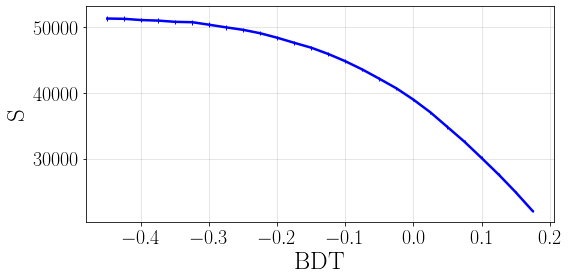

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed_MC_cor/BDT_vs_S.pdf


NameError: name 'lB_combi' is not defined

In [7]:
plot_x_list_ys(l_BDT, lS, 'BDT', 
               ['S'],
               name_folder=name_data)
plot_x_list_ys(l_BDT, lB_combi, 'BDT', 
               ['B'],
               name_folder=name_data)

plot_x_list_ys(l_BDT, lB2_combi, 'BDT', 
               ['$B_2$'],
               name_folder=name_data)

plot_x_list_ys(l_BDT, lB2_over_lB_combi, 'BDT', 
               ['$\\frac{B_2}{B}$'],
               name_folder=name_data)

In [ ]:
plot_x_list_ys(l_BDT, [[signal_purity],[signal_significance],[FoM]], 'BDT', 
               [['Signal purity'],['Signal significance'],['FoM']],
               [['$\\frac{S}{S+B}$'],['$\\frac{S}{\\sqrt{S+B}}$'],['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='common_cutDeltaM')

In [ ]:
plot_x_list_ys(l_BDT[:6], [signal_significance[:6]], 'BDT', 
               ['Signal significance'],
               [['$\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='common_cutDeltaM')

plot_x_list_ys(l_BDT[3:10], [FoM[3:10]], 'BDT', 
               ['FoM'],
               [['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='common_cutDeltaM')

## Plots with $\sigma_2$

### S, B

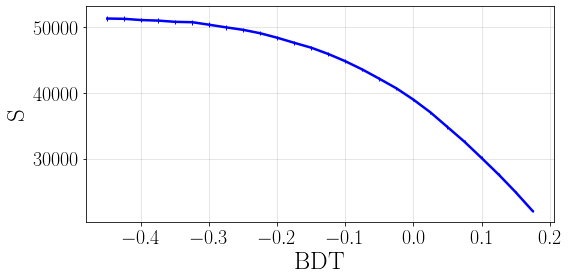

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed_MC_cor/BDT_vs_S.pdf


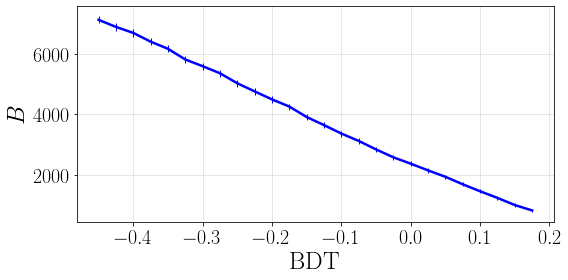

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed_MC_cor/BDT_vs_B.pdf


In [20]:
plot_x_list_ys(l_BDT, lS, 'BDT', 
               ['S'], surnames_y=['S'],
               name_folder=name_data)

plot_x_list_ys(l_BDT, lB2_combi, 'BDT', 
               ['$B$'],
               name_folder=name_data)

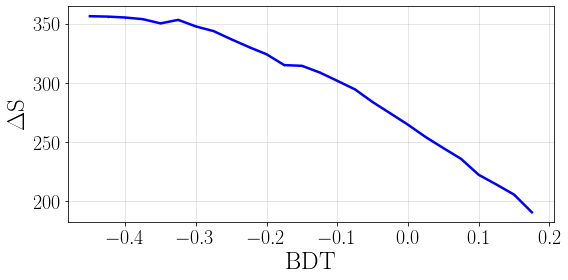

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed_MC_cor/BDT_vs_S_err.pdf


In [29]:
plot_x_list_ys(l_BDT, unumpy.std_devs(lS), 'BDT', 
               ['S_err'], surnames_y=['$\Delta $S'],
               name_folder=name_data)

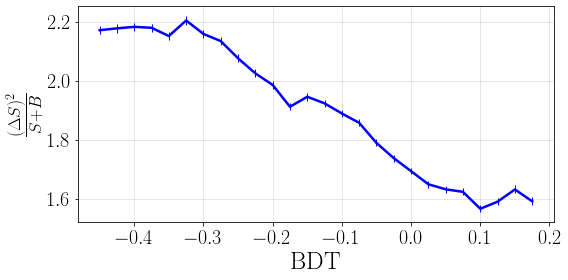

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed_MC_cor/BDT_vs_S_err2_d_S+B.pdf


In [35]:
plot_x_list_ys(l_BDT, np.square(unumpy.std_devs(lS))/(lS+lB2_combi), 'BDT', 
               ['S_err2_d_S+B'], surnames_y=['$\\frac{(\\Delta S)^2}{S+B}$'],
               name_folder=name_data)

### FoM

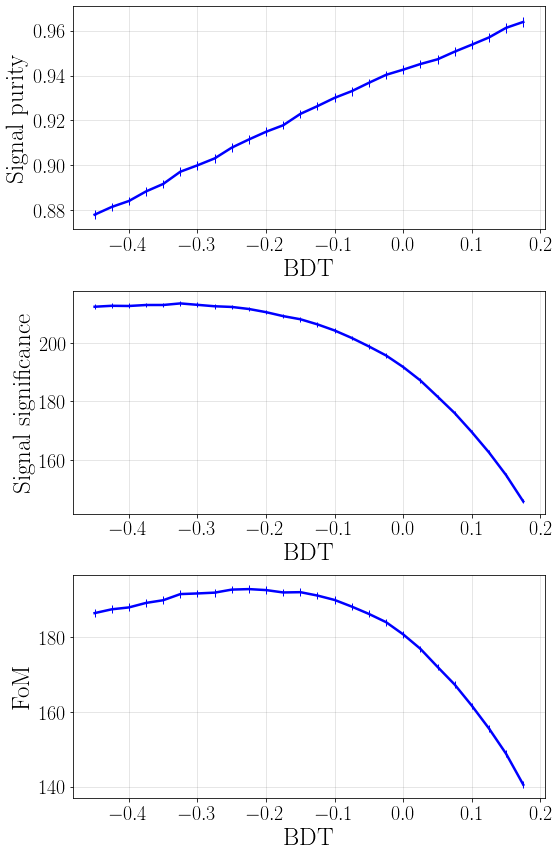

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/[['\\frac{S}{S+B}'],_['\\frac{S}{\\sqrt{S+B}}'],_['\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}']]_vs_Signal_purity_Signal_significance_FoM.pdf


In [17]:
plot_x_list_ys(l_BDT, [[signal_purity2],[signal_significance2],[FoM2]], 'BDT', 
               [['Signal purity'],['Signal significance'],['FoM']],
               [['$\\frac{S}{S+B}$'],['$\\frac{S}{\\sqrt{S+B}}$'],['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='common_cutDeltaM')

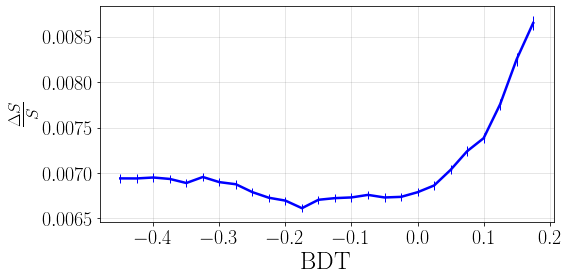

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed_MC_cor/BDT_vs_S_err_d_S.pdf


In [24]:
plot_x_list_ys(l_BDT, unumpy.std_devs(lS)/lS, 'BDT', 
               ['S_err_d_S'], surnames_y=['$\\frac{\\Delta S}{S}$'],
               name_folder=name_data)

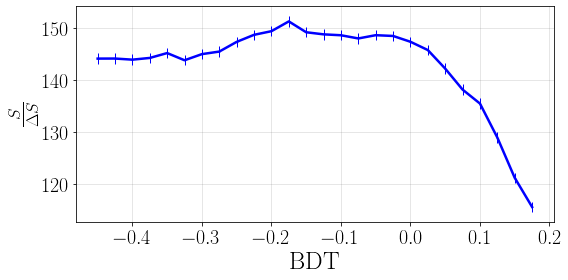

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed_MC_cor/BDT_vs_S_d_S_err.pdf


In [26]:
plot_x_list_ys(l_BDT, lS/unumpy.std_devs(lS), 'BDT', 
               ['S_d_S_err'], surnames_y=['$\\frac{S}{\\Delta S}$'],
               name_folder=name_data)

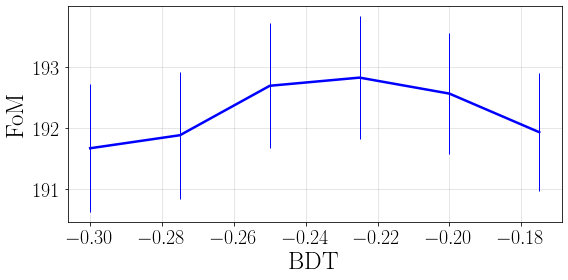

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/\frac{S}{S+B}\frac{S}{\sqrt{S+B}}_vs_FoM.pdf


In [18]:
start = 6
stop = 12
plot_x_list_ys(l_BDT[start:stop], FoM2[start:stop], 'BDT', 
               'FoM',
               '$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$', 
               name_folder='common_cutDeltaM')

### ROC curve

In [10]:
S_efficiency = efficiency(lS)
B_efficiency = efficiency(lB2_combi)

In [11]:
l_BDT_label = []
for BDT in l_BDT:
    value = BDT if round(BDT%0.05,3)==0 else None
    l_BDT_label.append(value)

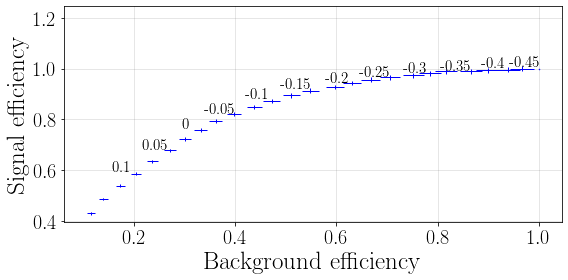

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/Background_efficiency_vs_Signal_efficiency.pdf


In [12]:
plot_x_list_ys(B_efficiency, S_efficiency, 'Background efficiency', 
               'Signal efficiency',
               name_folder='common_cutDeltaM', linestyle='', annotations=l_BDT_label, factor_ymax=1.2)

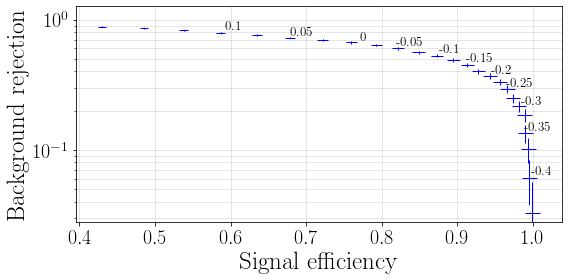

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/Signal__efficiency_vs_Background_rejection.pdf


In [13]:
plot_x_list_ys(S_efficiency, 1 - B_efficiency, 'Signal  efficiency', 
               'Background rejection',
               name_folder='common_cutDeltaM', linestyle='', annotations=l_BDT_label, factor_ymax=1.2, 
                fontsize_annot=13., log_scale='y',
               space_x=12, space_y=6)

## Optimal cut

In [14]:
import json
from bd2dst3pi.locations import loc

In [15]:
BDT=-0.225
#name_data_BDT = "common_cutDeltaM_V8_rFixed"
name_data_BDT = "common_cutDeltaM_V8_rFixed_MC_cor"
name_data = 'all_common_cutDeltaM_V8_fixedTails'

with open(f'{loc.JSON}/{name_data_BDT}_BDT{BDT}_params.json', 'r') as f:
    params_opt = json.load(f)

with open(f'{loc.JSON}/{name_data}_params.json', 'r') as f:
    params = json.load(f)       

In [16]:
DeltaSoverS_opt = params_opt[f"n_sig|BDT{BDT}_err"]/params_opt[f"n_sig|BDT{BDT}"]
DeltaSoverS = params[f"n_sig_err"]/params[f"n_sig"]

In [63]:
print("optimal: ", DeltaSoverS_opt)
print("No cuts: ", DeltaSoverS)

optimal:  0.0067271744893037935
No cuts:  0.007489910880635727
